In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import polars as pl
import seaborn as sns
from ipywidgets import widgets

In [3]:
uniprot_sprot = pd.read_parquet("uniprot_sprot_taxonomy_summary_with_domains.parquet")
uniprot_sprot.head()

,organism,reviewed_count,unreviewed_count,pdb_structures_count,organism_id,lineage,type,type_merge_microbes,superdomain,domain,kingdom,reviewed_count_radius,unreviewed_count_radius,pdb_structures_count_radius
0,Homo sapiens,20417,20417,8511,9606,Catarrhini; Chordata; Craniata; Euarchontoglir...,Animal,Animal,Cellular Life,Eukaryota,Animal,80.615960,80.615960,52.049356
1,Mus musculus,17228,17228,2458,10090,Chordata; Craniata; Euarchontoglires; Eukaryot...,Animal,Animal,Cellular Life,Eukaryota,Animal,74.052972,74.052972,27.971516
2,Arabidopsis thaliana,16396,16396,1057,3702,Arabidopsis; Brassicaceae; Brassicales; Cameli...,Plant,Plant,Cellular Life,Eukaryota,Plant,72.242708,72.242708,18.342670
3,Rattus norvegicus,8209,8209,724,10116,Chordata; Craniata; Euarchontoglires; Eukaryot...,Animal,Animal,Cellular Life,Eukaryota,Animal,51.117569,51.117569,15.180789
4,Saccharomyces cerevisiae (strain ATCC 204508 /...,6733,6733,2114,559292,Ascomycota; Dikarya; Eukaryota; Fungi; Sacchar...,Fungi,Fungi,Cellular Life,Eukaryota,Fungi,46.294497,46.294497,25.940453


## Test squarify

In [8]:
# load libraries
import matplotlib.pyplot as plt
import pandas as pd
import squarify  # pip install squarify (algorithm for treemap)
from highlight_text import fig_text
from pypalettes import load_cmap

# set a higher resolution
plt.rcParams["figure.dpi"] = 300

df = pd.read_csv(
    "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/simple-treemap.csv"
)
df

,type,name,value,parent
0,leaf,Mark,90,Team Dataviz
1,leaf,Robert,12,Team Dataviz
2,leaf,Emily,34,Team Dataviz
3,leaf,Marion,53,Team Dataviz
4,leaf,Nicolas,98,Team DevOps
5,leaf,Malki,22,Team DevOps
6,leaf,Djé,12,Team DevOps
7,leaf,Mélanie,45,Team Sales
8,leaf,Einstein,76,Team Sales


## Make sure their example works

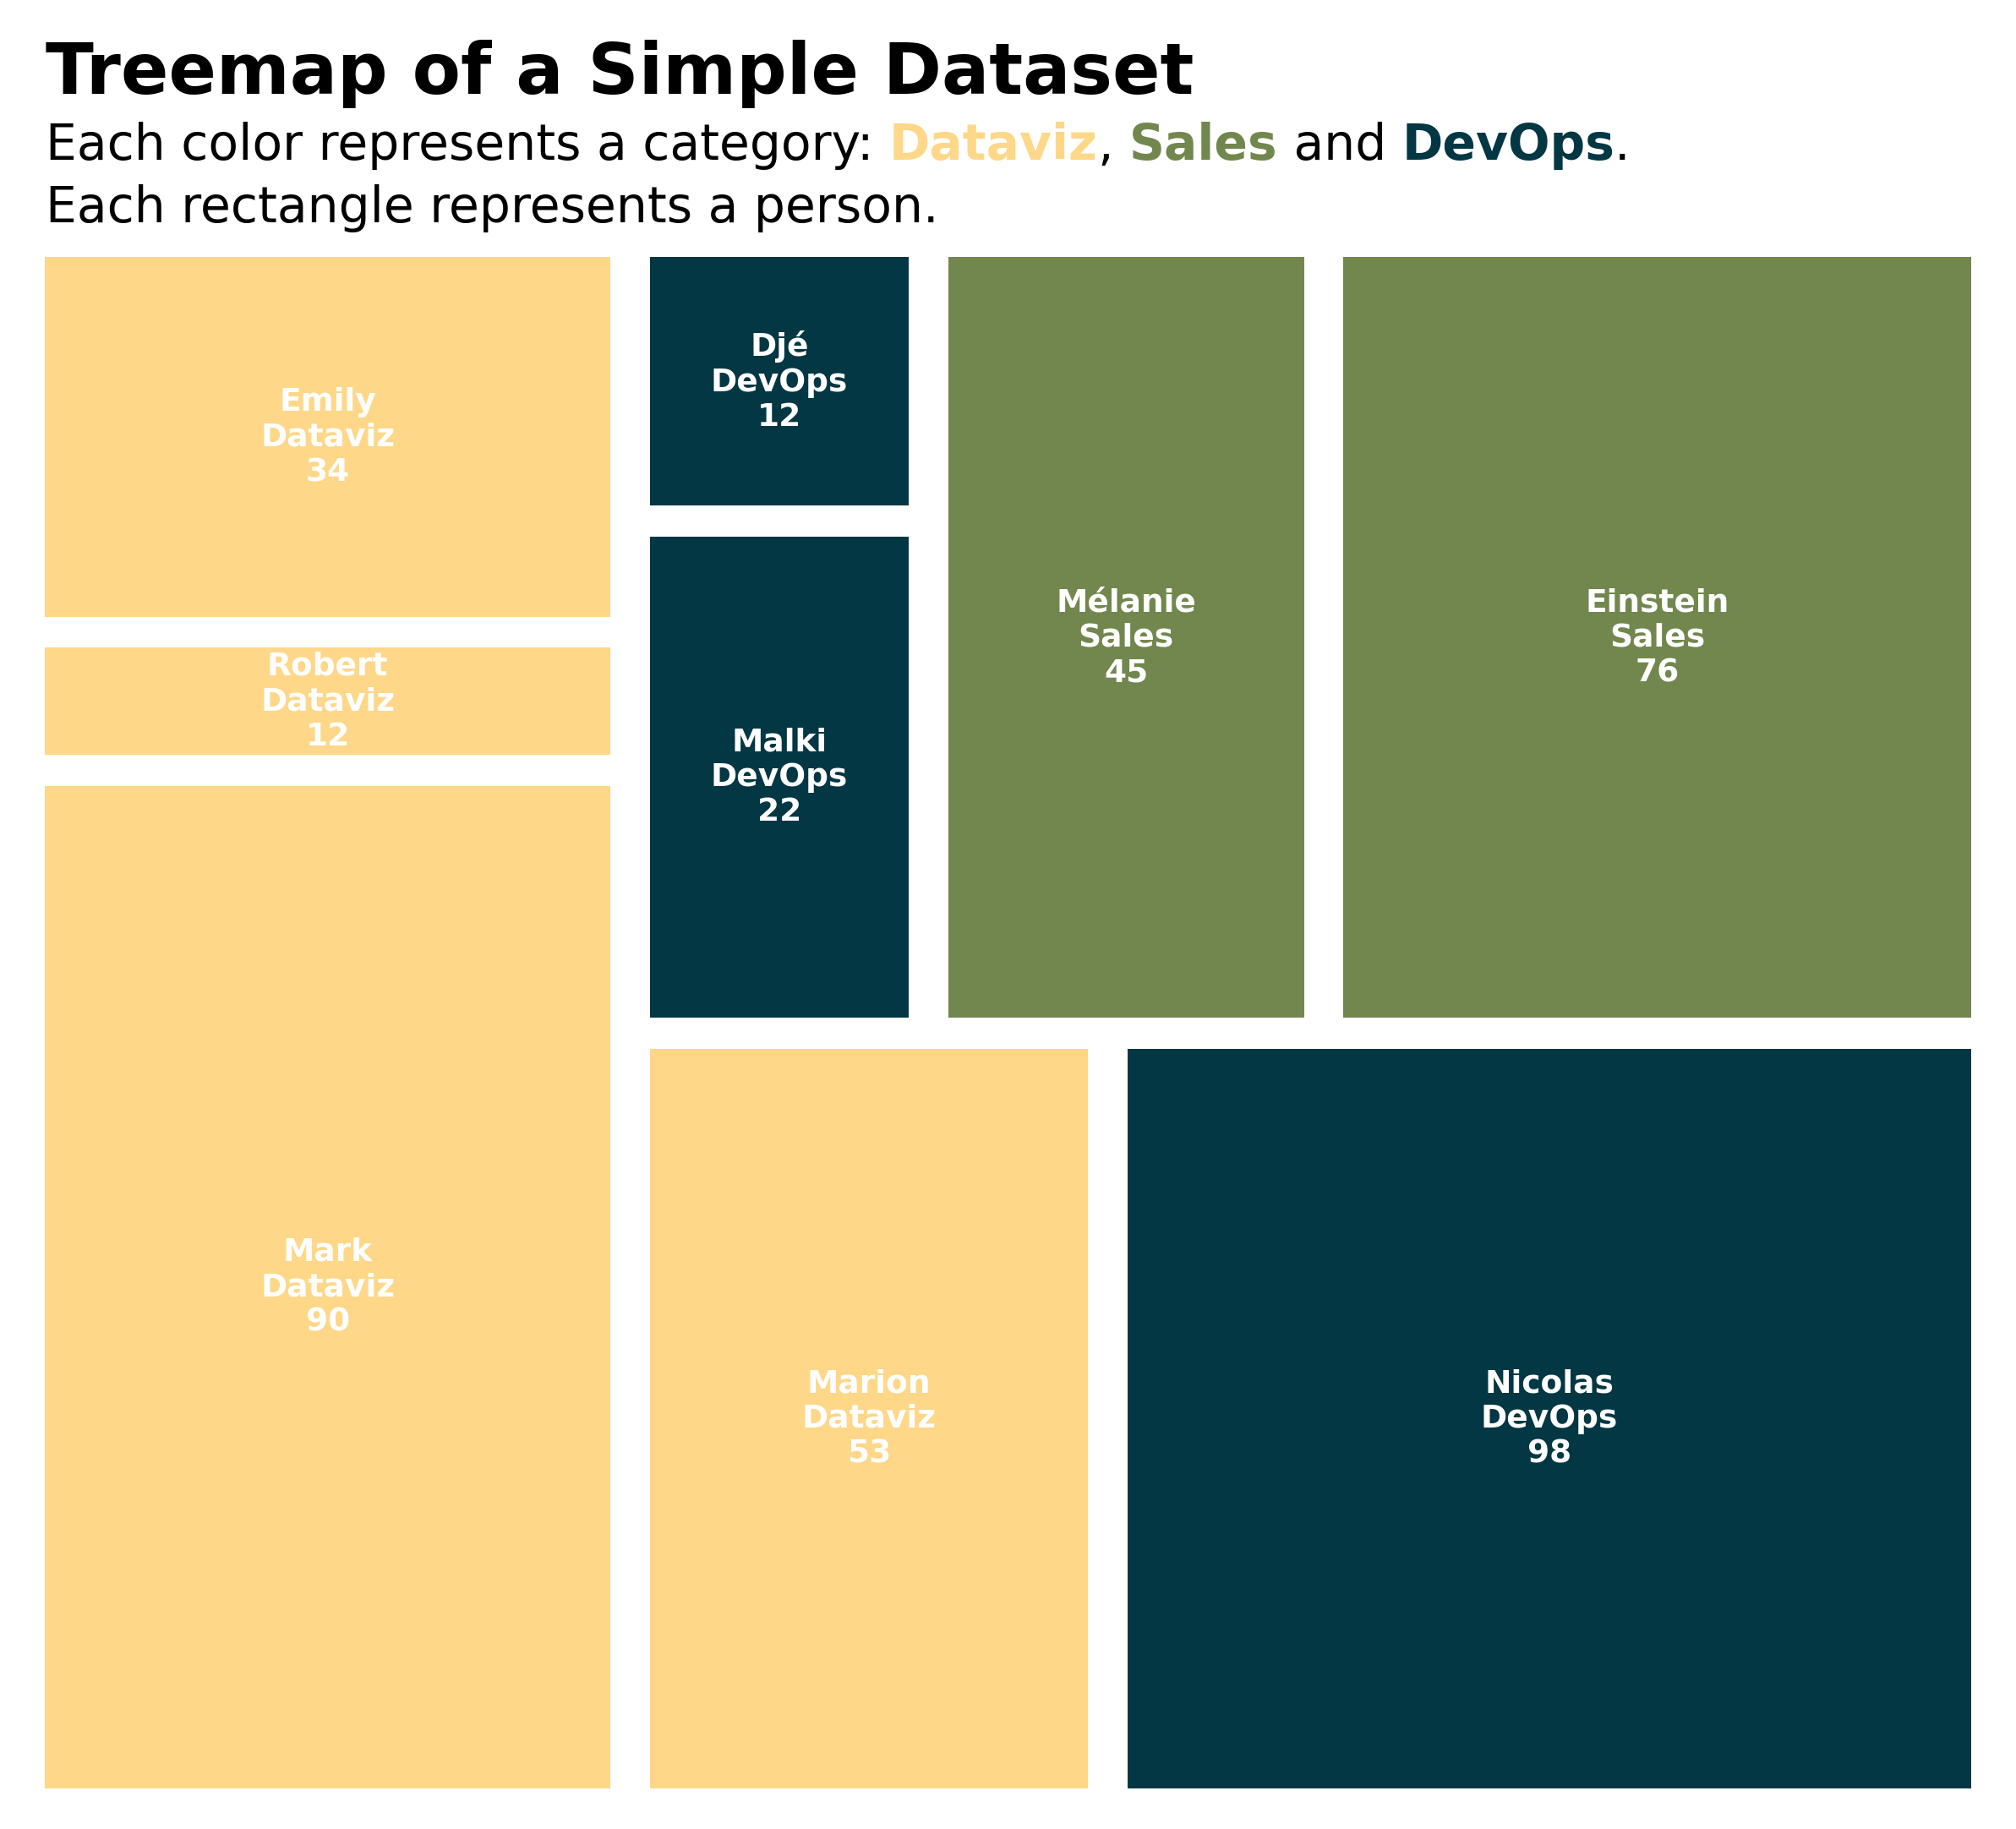

In [9]:
# create a color palette
cmap = load_cmap("Acadia")
category_codes, unique_categories = pd.factorize(df["parent"])
colors = [cmap(code) for code in category_codes]

# customize the labels
labels = [
    f"{name}\n{parent[5:]}\n{value}"
    for name, value, parent in zip(df["name"], df["value"], df["parent"])
]

# create a treemap
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_axis_off()
squarify.plot(
    sizes=df["value"],
    label=labels,
    color=colors,
    text_kwargs={"color": "white", "fontsize": 9, "fontweight": "bold"},
    pad=True,
    ax=ax,
)

# add a title and legend
text = """<Treemap of a Simple Dataset>
Each color represents a category: <Dataviz>, <Sales> and <DevOps>.
Each rectangle represents a person.
"""
fig_text(
    x=0.133,
    y=0.98,
    s=text,
    color="black",
    highlight_textprops=[
        {"fontsize": 20, "fontweight": "bold"},
        {"color": cmap(0), "fontweight": "bold"},
        {"color": cmap(2), "fontweight": "bold"},
        {"color": cmap(1), "fontweight": "bold"},
    ],
    fontsize=14,
    ha="left",
)

plt.show()

## Try on the uniprot data

In [20]:
uniprot_sprot.domain.value_counts()

domain
Eukaryota    8400
Bacteria     3353
Viruses      2766
Archaea       236
Name: count, dtype: int64

/Users/olga/anaconda3/envs/2025-biodata-wealth-inequality/lib/python3.13/site-packages/squarify/__init__.py:231: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap()


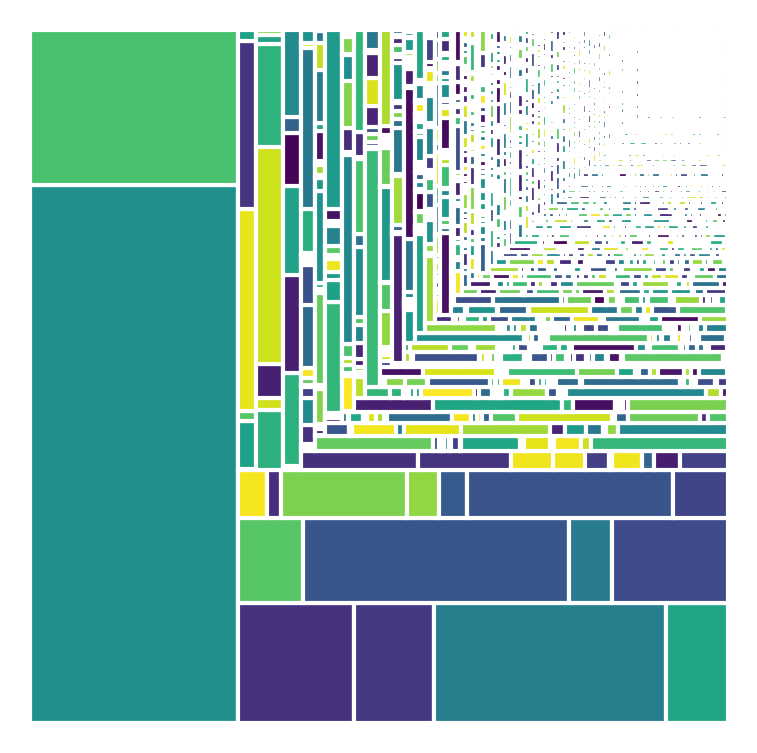

In [19]:
def make_treemap(df, col):

    # create a figure
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.set_axis_off()

    # add treemap
    squarify.plot(
        sizes=df.query(f"{col} > 0")[col],
        # label=uniprot_sprot["organism"],
        ax=ax,
        # bar_kwargs=dict(linewidth=1, edgecolor="white"),
    )


make_treemap(uniprot_sprot, "pdb_structures_count")

/Users/olga/anaconda3/envs/2025-biodata-wealth-inequality/lib/python3.13/site-packages/squarify/__init__.py:231: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap()


<Axes: >

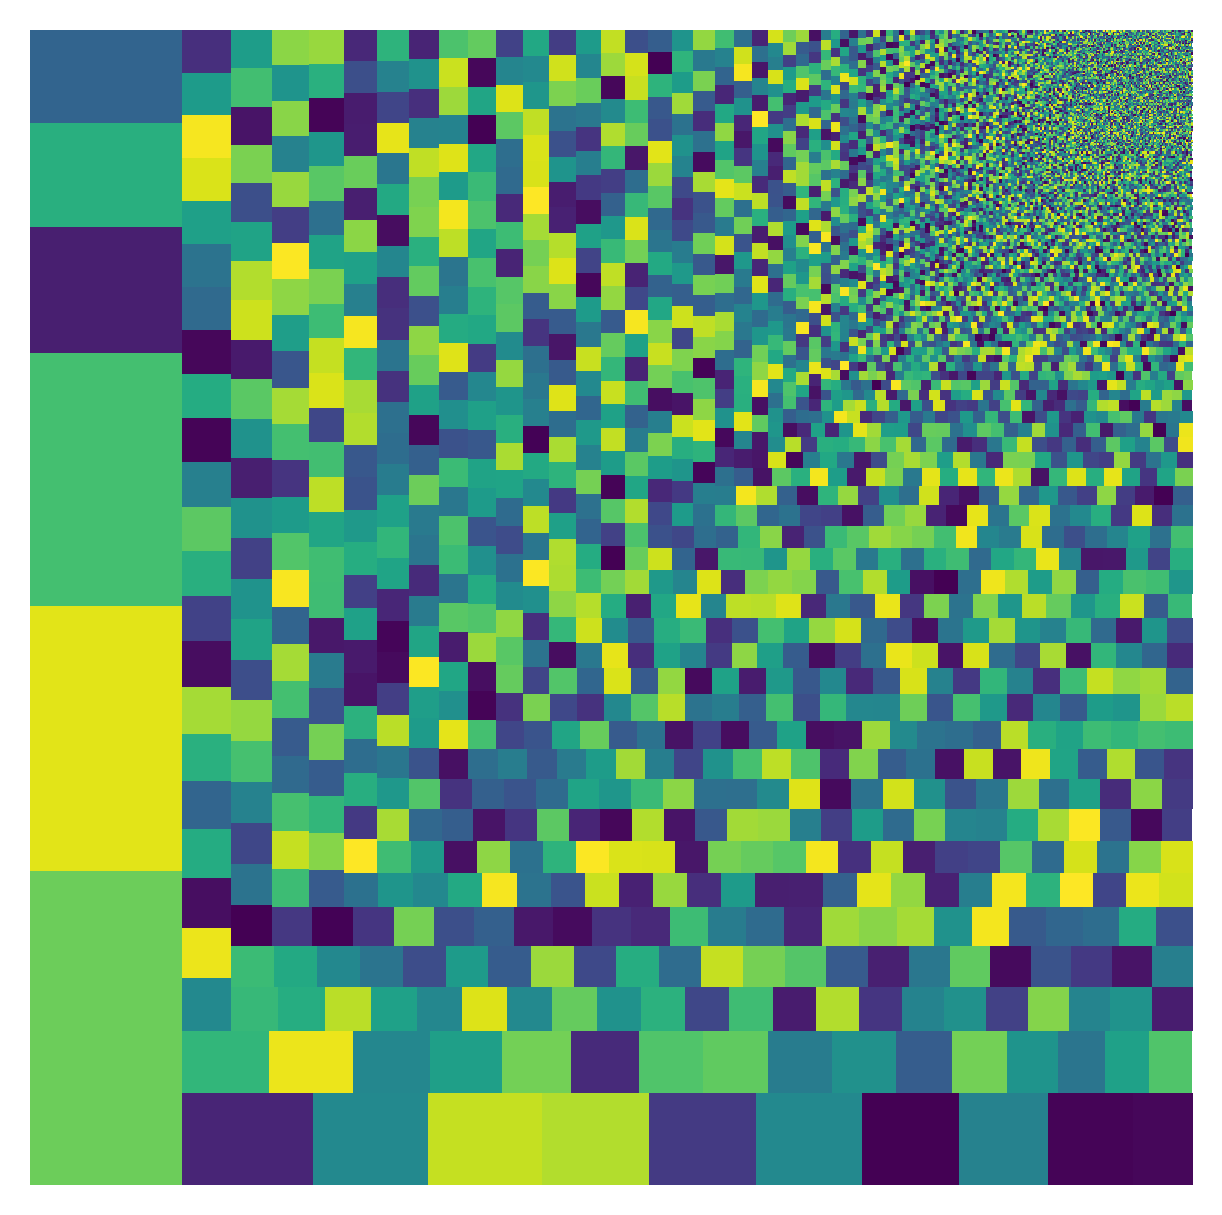

In [14]:
# create a figure
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_axis_off()

# add treemap
squarify.plot(
    sizes=uniprot_sprot["reviewed_count"],
    # label=uniprot_sprot["organism"],
    ax=ax,
)